In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
#!pip install statsmodels

In [13]:
df = pd.read_csv('C:/Users/Owner/Desktop/git/Advertising/마케팅 프로모션 매체/marketing_sales_data.csv')

In [14]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [15]:
df.shape

(572, 5)

In [16]:
df. describe()

,Radio,Social Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


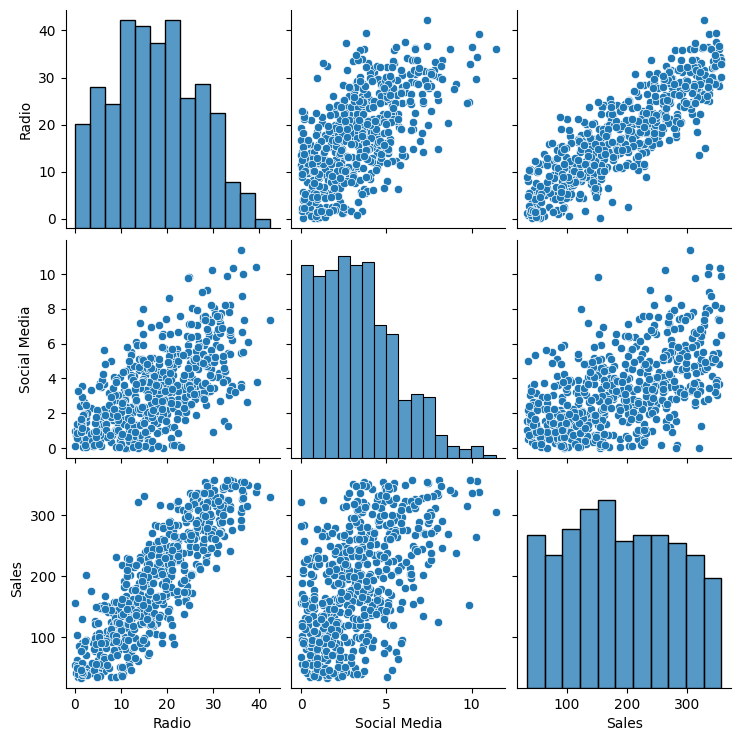

In [17]:
sns.pairplot(df)

In [18]:
#각 TV 카테고리의 평균 매출액을 계산한다.

In [22]:
df.groupby('TV')['Sales'].mean()

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [23]:
#각 인플루언서 카테고리의 평균 매출액을 계산한다.

In [24]:
df.groupby('Influencer')['Sales'].mean()

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

In [25]:
#Insigt

#TV 프로모션의 평균 매출액은 중저 TV 프로모션의 평균 매출액보다 상당히 높다. TV는 매출액의 강력한 예측 변수가 될 수 있다.
#인플루언서의 범주들은 판매 평균이 다르지만 변동이 크지는 않다. 인플루언서는 판매에 대해 약한 예측 변수일 수 있다.

In [26]:
#결측치 제거

In [27]:
df=df.dropna(axis=0)

In [29]:
#열 정리
# 공백이 들어 있는 데이터의 모든 열 이름을 바꿉니다.

In [32]:
df = df.rename(columns={'Social Media': 'Social-Media'})

In [34]:
#매출을 예측하는 다중 선형 회귀 모형 적합성 검사

In [37]:
# OLS 공식을 정의한다.

ols_formula = 'Sales ~ C(TV) + Radio'

In [40]:
# OLS 모델을 생성한다.

OLS = ols(formula = ols_formula, data = df)

In [41]:
# 모델을 맞추다.

model = OLS.fit()

In [42]:
# 결과 요약을 저장한다.

model_results = model.summary()

In [43]:
# 모델 결과를 보여준다.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.63e-288
Time:                        15:37:32   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Notes: 표준 오차는 오차의 공분산 행렬이 올바르게 지정되었다고 가정

In [45]:
#모형 가정: 선형성

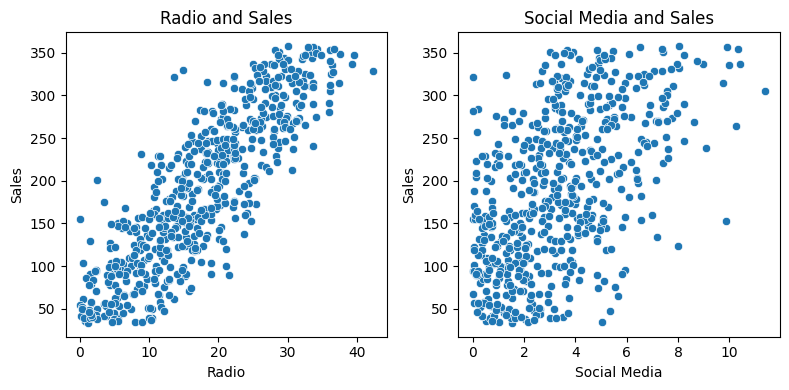

In [47]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.scatterplot(x = df['Radio'], y = df['Sales'],ax=axes[0])
axes[0].set_title("Radio and Sales")

sns.scatterplot(x = df['Social_Media'], y = df['Sales'],ax=axes[1])
axes[1].set_title("Social Media and Sales")

axes[1].set_xlabel("Social Media")

plt.tight_layout()

In [48]:
#모형 가정: 독립성

In [49]:
#모형 가정: 정규성

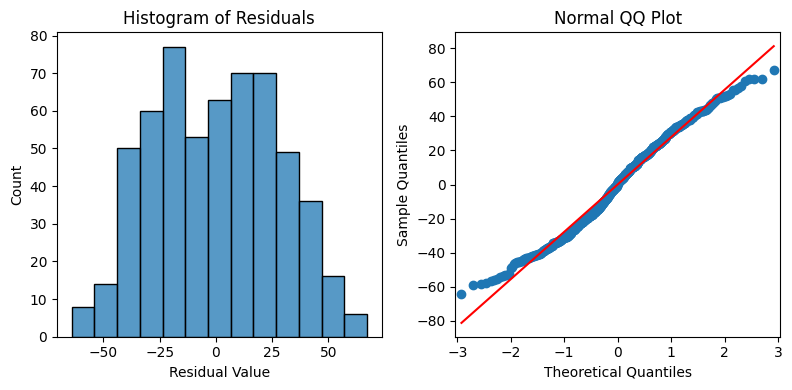

In [50]:
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

In [51]:
#주요 Insigth

#잔차의 히스토그램은 근사적으로 정규 분포를 나타내므로 이 모형에서 정규성 가정이 충족됨을 뒷받침 함. Q-Q 그림의 잔차는 직선을 이루며 이 가정이 충족됨을 더욱 뒷받침 함.

In [52]:
#모형 가정: 상수 분산

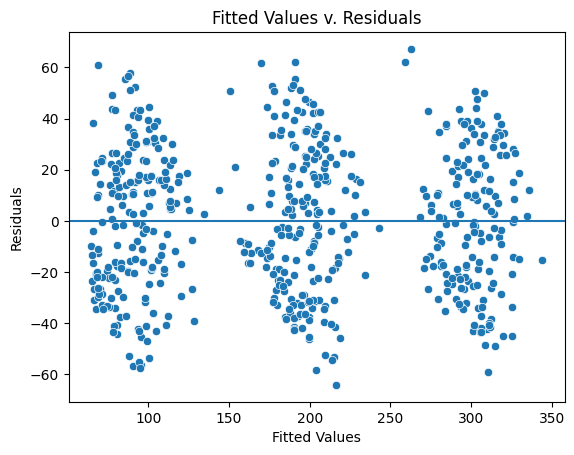

In [53]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)

plt.show()

In [54]:
#주요 insight

#이 모형에서는 범주형 변수가 지배적이기 때문에 적합치가 세 그룹으로 나뉘는데, 이는 TV가 매출을 결정하는 가장 큰 요인임을 의미한다.

#그러나 적합치가 있는 분산도 마찬가지로 분포되어 있으므로 가정이 충족됨을 확인할 수 있다.

In [55]:
#모형 가정: 다중 공선성 없음
#다중공선성이 없다는 가정은 두 개의 독립적인 변수가 없다는 것을 의미한다(Xi 그리고 Xj)는 서로 높은 상관관계를 가질 수 있다.

#다중 공선성을 검사하는 두 가지 일반적인 방법은 다음과 같다:

#독립 변수 쌍 간의 관계를 표시하기 위한 산점도 작성
#분산 팽창 계수를 사용하여 다중 공선성 탐지
#두 가지 방법을 모두 사용하여 모형의 다중 공선성이 없는 가정을 확인한다.

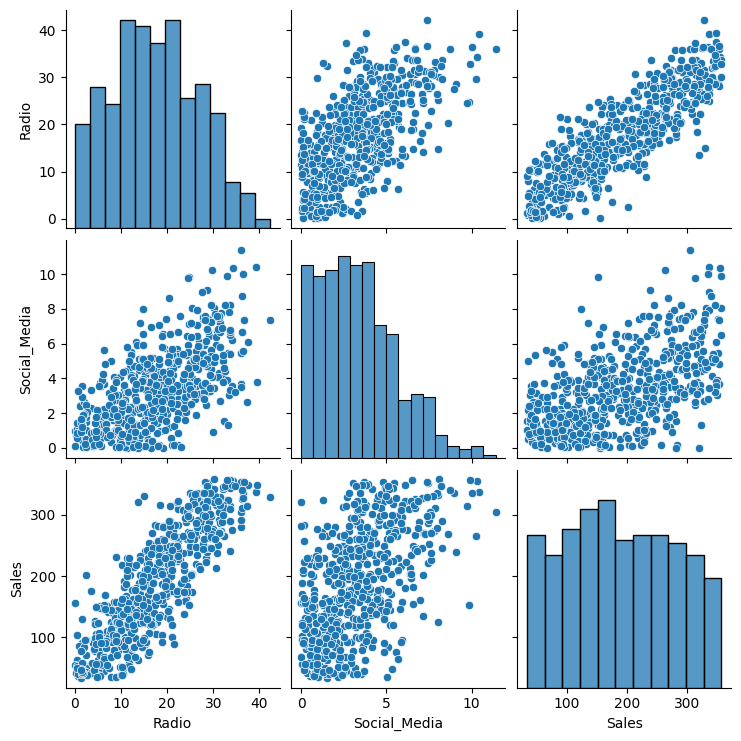

In [57]:
sns.pairplot(df)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Radio','Social_Media']]


vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df1_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

df1_vif

,VIF
Radio,5.170922
Social_Media,5.170922


In [61]:
#주요 insght:

#앞의 모형은 하나의 연속 독립 변수만 가지고 있으므로 다중 공선성 문제가 없다.

#모형이 Radio와 Social_Media를 모두 예측변수로 사용하였다면 Radio와 Social_Media 간에는 다중공선성 가정에 위배되는 중간 수준의 선형관계가 존재할 것이다. 나아가 Radio와 Social_Media를 모두 모형에 포함하였을 때의 분산팽창계수는 각 변수별로 5.17로 높은 다중공선성을 나타낸다.

In [62]:
### 결과 그리고 평가

#OLS 회귀분석 결과

In [63]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          1.63e-288
Time:                        15:37:32   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""